In [11]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt

# 1. Data Preparation

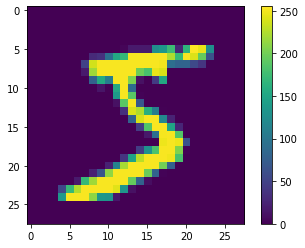

In [21]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## 1.1. Reshape Images Into 4 Dimensions
    4 Dimensions: (Number of image, image_height, image_width, color_channels)
    
    For color images, the number of channels is 3 (red, green, blue). 
    For monochrome images, the number of channels is 1 (black).

### 1.2. Normalization

Scale these values to a range of 0 to 1 before feeding to the neural network model. 
For this, we divide the values by 255.

In [2]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

## 2. Build Convolutional Neural Network

### 2.1. Write Model Template


### 2.1.1. Conv2D Layer
    32: the number of filters that the convolutional layer will learn.
    (3,3): kernel_size that a 2-tuple specifying the width and height of the 2D convolution window.
    
### 2.1.2. MaxPooling2D Layer
    Max pooling is then used to reduce the spatial dimensions of the output volume.

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


Flatten Output From 3D to 1D

MNIST has 10 output classes, so we use a final Dense layer with 10 outputs and a softmax activation.

In [14]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

### 2.2. Compile and train the model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.

Optimizer —This is how the model is updated based on the data it sees and its loss function. 'adam" uses the squared gradients to scale the learning rate.

Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 49s 808us/sample - loss: 0.1454 - acc: 0.9551
Epoch 2/5
60000/60000 [==============================] - 48s 799us/sample - loss: 0.0485 - acc: 0.9847
Epoch 3/5
60000/60000 [==============================] - 48s 797us/sample - loss: 0.0325 - acc: 0.9900
Epoch 4/5
60000/60000 [==============================] - 48s 794us/sample - loss: 0.0262 - acc: 0.9914
Epoch 5/5
60000/60000 [==============================] - 46s 760us/sample - loss: 0.0191 - acc: 0.9939


### 3. Evaluate the model

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 241us/sample - loss: 0.0366 - acc: 0.9887


In [15]:
print(test_acc)

0.9887
